#Creating the specified plots and applying k-means clustering and line fitting techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
cars_data = pd.read_csv("cars.csv")

In [3]:
# Print out all the head names
print(cars_data.head)

<bound method NDFrame.head of       mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year  \
0    14.0           8          350  165       4209           12   1972   
1    31.9           4           89   71       1925           14   1980   
2    17.0           8          302  140       3449           11   1971   
3    15.0           8          400  150       3761           10   1971   
4    30.5           4           98   63       2051           17   1978   
..    ...         ...          ...  ...        ...          ...    ...   
256  17.0           8          305  130       3840           15   1980   
257  36.1           4           91   60       1800           16   1979   
258  22.0           6          232  112       2835           15   1983   
259  18.0           6          232  100       3288           16   1972   
260  22.0           6          250  105       3353           15   1977   

        brand  
0         US.  
1     Europe.  
2         US.  
3         US.  
4

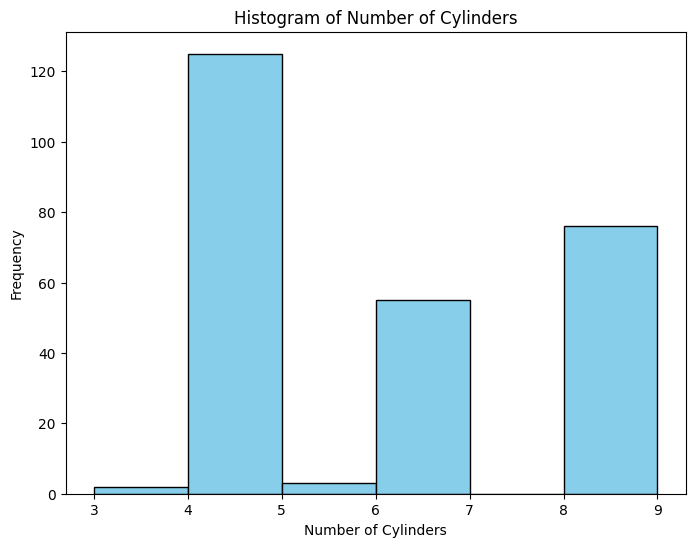

In [4]:
# Plot a histogram of cylinders
plt.figure(figsize=(8, 6))
plt.hist(cars_data[' cylinders'], bins=range(3, 10), color='skyblue', edgecolor='black')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Cylinders')
plt.show()


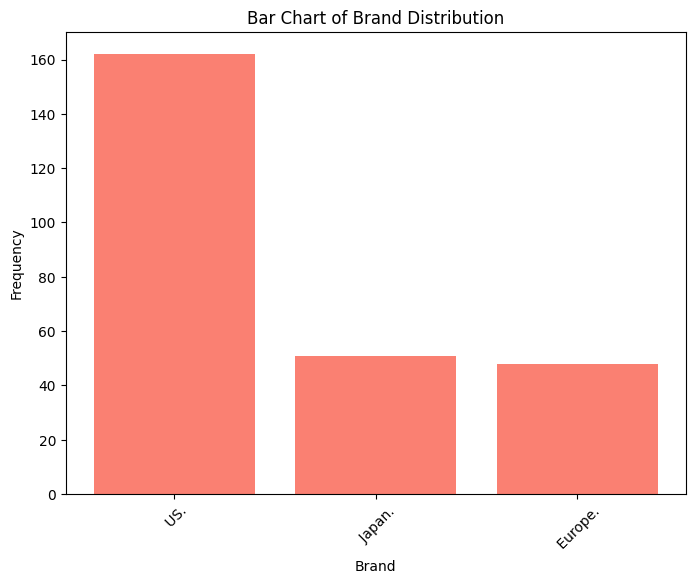

In [5]:
# Plot a bar chart of brand distribution
plt.figure(figsize=(8, 6))
brand_counts = cars_data[' brand'].value_counts()
plt.bar(brand_counts.index, brand_counts.values, color='salmon')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Bar Chart of Brand Distribution')
plt.xticks(rotation=45)
plt.show()


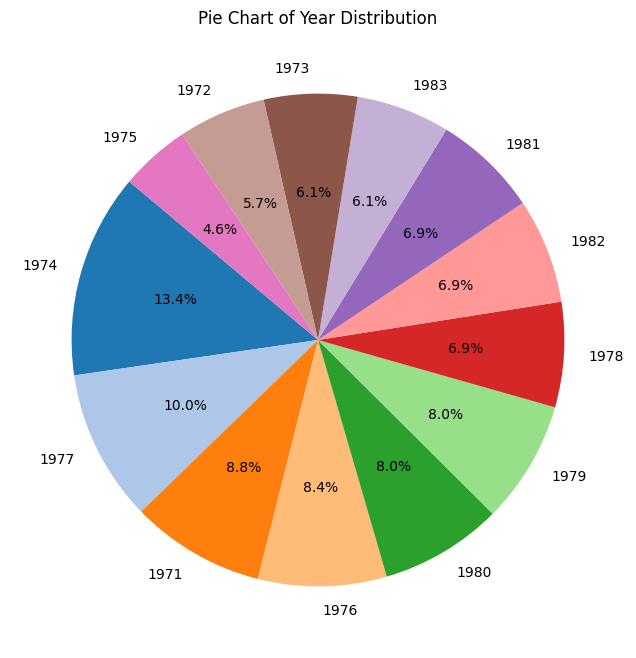

In [6]:
# Plot a pie chart of year distribution
plt.figure(figsize=(8, 8))
year_counts = cars_data[' year'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Pie Chart of Year Distribution')
plt.show()

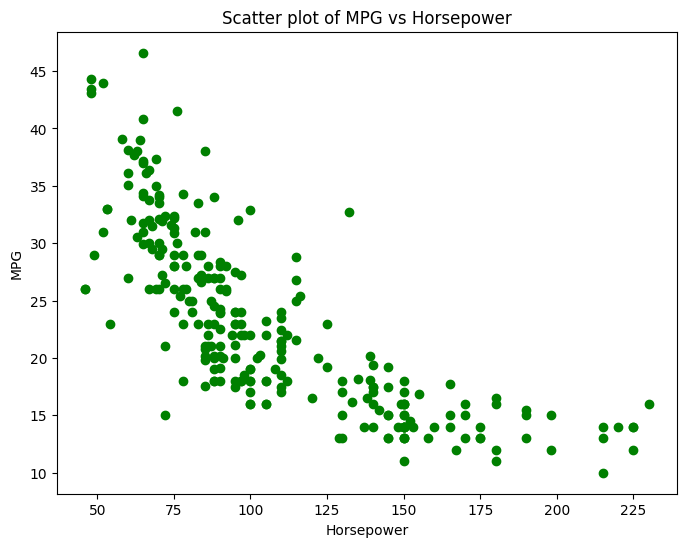

In [7]:
# Plot a scatter graph of MPG vs Horsepower (hp)
plt.figure(figsize=(8, 6))
plt.scatter(cars_data[' hp'], cars_data['mpg'], color='green')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Scatter plot of MPG vs Horsepower')
plt.show()

In [8]:
# Remove rows with missing values in the ' cubicinches' and ' weightlbs' columns
cars_data = cars_data[(cars_data[' cubicinches'] != ' ') & (cars_data[' weightlbs'] != ' ')]

# Convert ' cubicinches' and ' weightlbs' columns to numeric format
cars_data.loc[:, ' cubicinches'] = pd.to_numeric(cars_data[' cubicinches'])
cars_data.loc[:, ' weightlbs'] = pd.to_numeric(cars_data[' weightlbs'])

# Perform K-means clustering on the dataset
X = cars_data[['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original DataFrame
cars_data.loc[:, 'cluster'] = kmeans.labels_


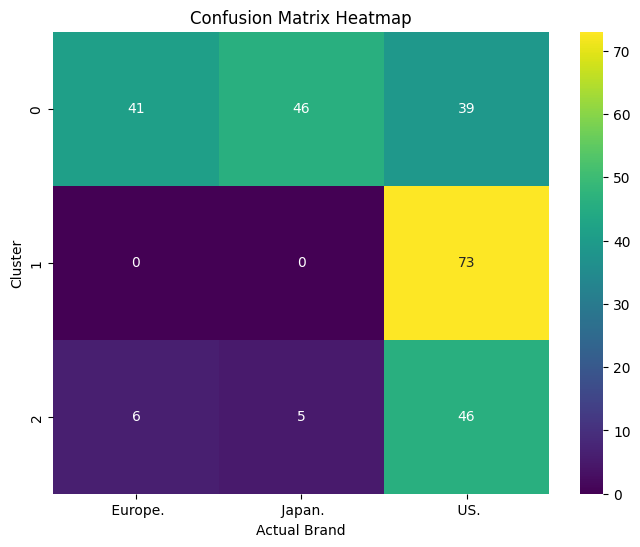

In [9]:
plt.figure(figsize=(8, 6))
confusion_matrix = pd.crosstab(cars_data['cluster'], cars_data[' brand'])
sns.heatmap(confusion_matrix, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Actual Brand')
plt.ylabel('Cluster')
plt.title('Confusion Matrix Heatmap')
plt.show()


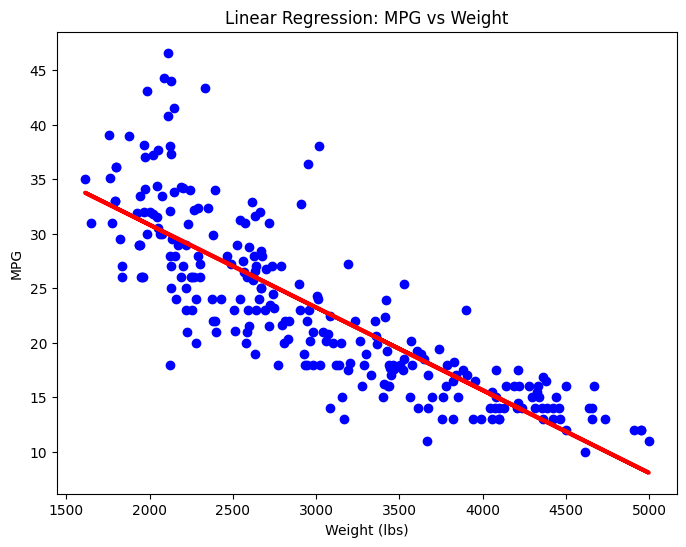

In [10]:
X_weight = cars_data[[' weightlbs']]
y_mpg = cars_data['mpg']
reg = LinearRegression()
reg.fit(X_weight, y_mpg)
plt.figure(figsize=(8, 6))
plt.scatter(X_weight, y_mpg, color='blue')
plt.plot(X_weight, reg.predict(X_weight), color='red', linewidth=3)
plt.xlabel('Weight (lbs)')
plt.ylabel('MPG')
plt.title('Linear Regression: MPG vs Weight')
plt.show()


<ipython-input-11-66b57835c27a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=' cylinders', y='mpg', data=cars_data, palette='muted')


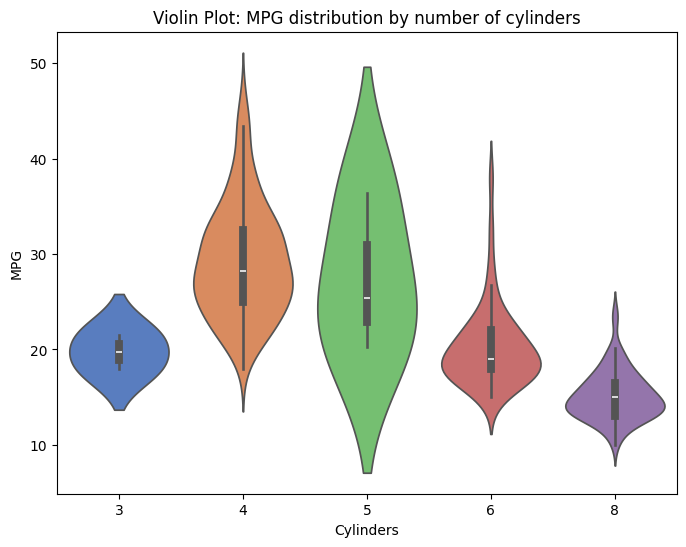

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=' cylinders', y='mpg', data=cars_data, palette='muted')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Violin Plot: MPG distribution by number of cylinders')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

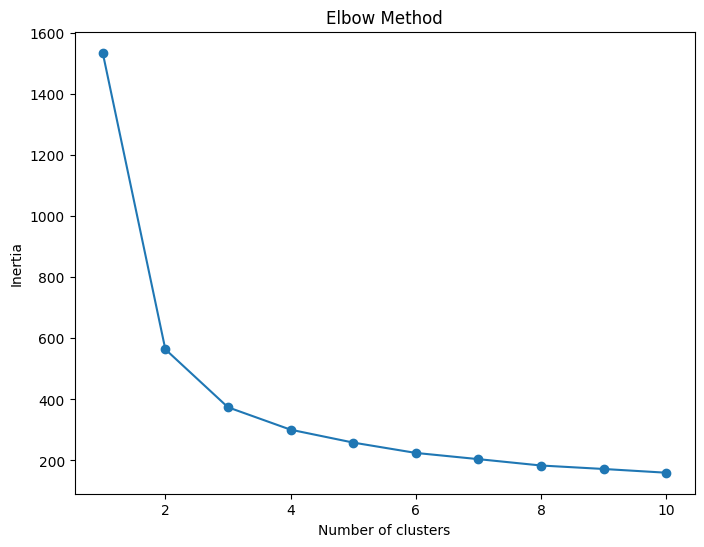

In [12]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

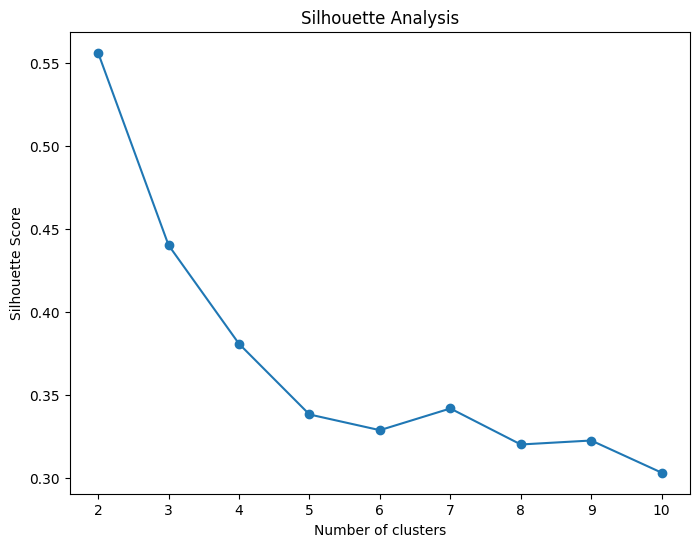

In [13]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


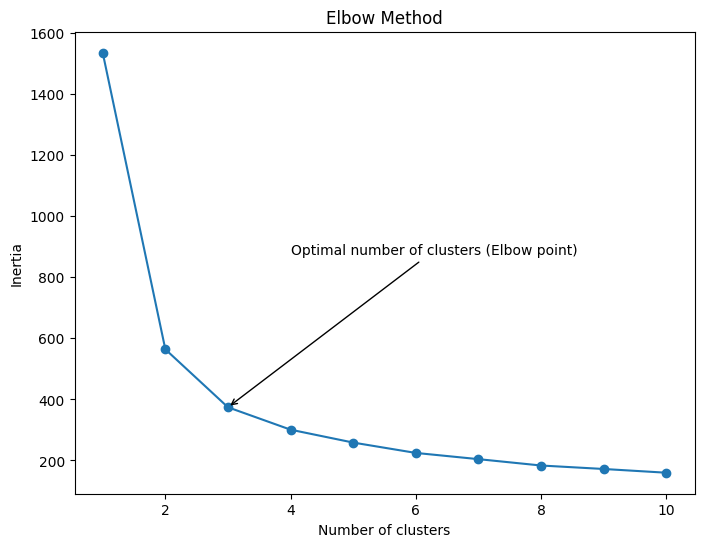

In [14]:
# Plot an elbow plot to determine optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.annotate('Optimal number of clusters (Elbow point)', xy=(3, inertia[2]), xytext=(4, inertia[2]+500), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

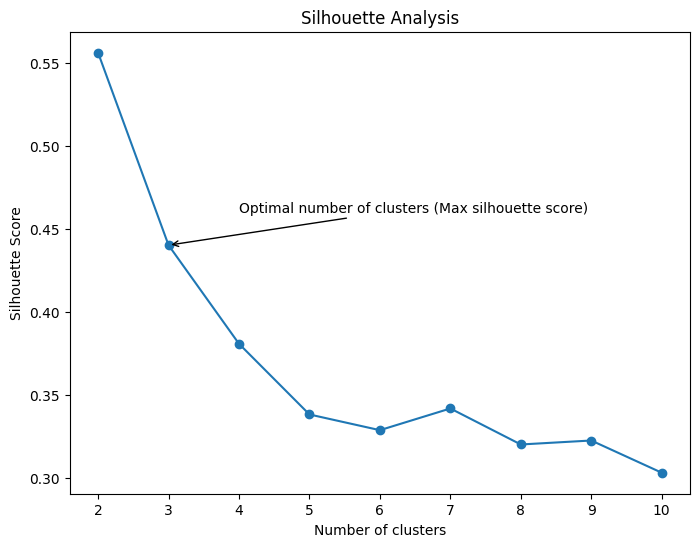

In [15]:
# Plot silhouette scores to evaluate clustering quality
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.annotate('Optimal number of clusters (Max silhouette score)', xy=(3, silhouette_scores[1]), xytext=(4, silhouette_scores[1]+0.02), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

In [19]:
from sklearn.cluster import KMeans

# Assuming that X_scaled is your preprocessed dataset
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(X_scaled)

# The cluster labels for each instance
labels = kmeans.labels_

# Add labels to the dataframe
cars_data['cluster'] = labels


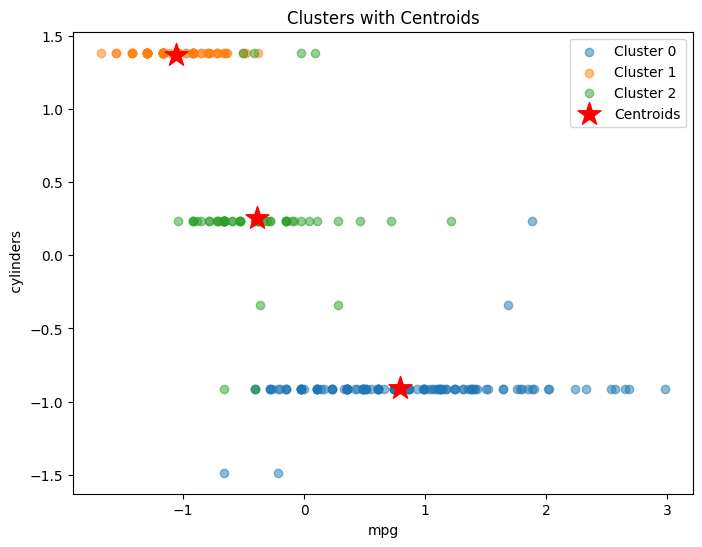

In [22]:
import matplotlib.pyplot as plt

# Get the column names for the features
x_label = X.columns[0]  # Assuming the first column is the x-axis feature
y_label = X.columns[1]  # Assuming the second column is the y-axis feature

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_label in set(labels):
    cluster_points = X_scaled[labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Clusters with Centroids')
plt.legend()
plt.show()
